In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dataset = pd.read_csv('../../data/funda_train.csv')

<AxesSubplot:>

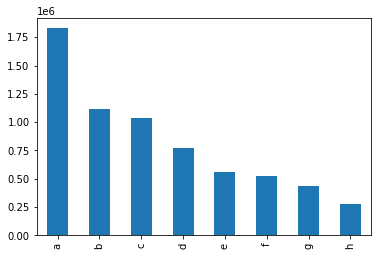

In [68]:
dataset['card_company'].value_counts().plot(kind = 'bar')

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [70]:
dataset['datetime'] = pd.to_datetime(dataset.transacted_date + " " + 
                                dataset.transacted_time, format='%Y-%m-%d %H:%M:%S')

In [71]:
dataset['log_time'] = dataset['datetime'].dt.time

In [72]:
dataset['log_time'][1] < dataset['log_time'][2]

True

In [73]:
import datetime

In [74]:
afternoon = datetime.time(12,00)

In [75]:
len(dataset)

6556613

In [76]:
5582065/6556613

0.8513641113178405

In [82]:
dataset_time = dataset.sort_values(by=['log_time'], axis=0, ascending=False)

In [83]:
dataset_time

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,log_time
1980201,684,1378312,b,2018-04-11,23:59,0,경기 포천시,한식 음식점업,1000.000000,2018-04-11 23:59:00,23:59:00
32542,10,29591,f,2017-09-16,23:59,0,NaN,NaN,6285.714286,2017-09-16 23:59:00,23:59:00
2948152,963,2053573,c,2018-07-13,23:59,0,NaN,NaN,2214.285714,2018-07-13 23:59:00,23:59:00
5617156,1848,3992542,c,2018-12-18,23:59,0,서울 마포구,NaN,2914.285714,2018-12-18 23:59:00,23:59:00
1157752,425,785685,a,2018-04-27,23:59,0,서울 강남구,NaN,3857.142857,2018-04-27 23:59:00,23:59:00
...,...,...,...,...,...,...,...,...,...,...,...
4068123,1333,2883666,f,2018-04-07,00:00,0,대구 중구,한식 음식점업,14142.857143,2018-04-07 00:00:00,00:00:00
4721063,1550,3365318,a,2017-06-28,00:00,0,충북 청주시,NaN,1571.428571,2017-06-28 00:00:00,00:00:00
3043516,991,2117826,f,2017-07-15,00:00,0,서울 용산구,NaN,6428.571429,2017-07-15 00:00:00,00:00:00
4721012,1550,3365310,c,2017-06-21,00:00,0,충북 청주시,NaN,428.571429,2017-06-21 00:00:00,00:00:00


In [85]:
dataset_time = dataset_time.set_index('log_time')

In [88]:
drop_features = ['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business','datetime']

dataset_time = dataset_time.drop(drop_features, axis=1)

<AxesSubplot:xlabel='log_time'>

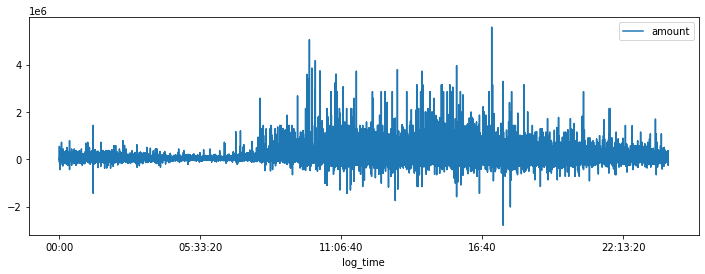

In [91]:
dataset_time.plot(figsize = (12,4))

In [81]:
len(dataset['log_time'])

6556613

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

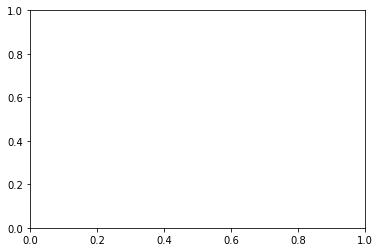

In [80]:
plt.bar(dataset['log_time'],dataset['amount'])

plt.show()

In [36]:
dataset['region'] = dataset['region'].fillna('지역 모름')

In [69]:
a = dataset['region'][0:5].values[0][0:2]


In [44]:

dataset['지역'] = dataset['region'][i][0:2]


C:\Users\JH\AppData\Local\Temp/ipykernel_18832/2212702150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['지역'][i] = dataset['region'][i][0:2]


KeyboardInterrupt: 

In [37]:
dataset.loc[(dataset['log_time'] > afternoon)]

KeyError: 'log_time'

In [63]:
dataset.loc[(dataset['log_time'] < afternoon)]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,log_time
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016-06-02 11:06:00,11:06:00
14,0,14,a,2016-06-04,11:15,0,NaN,기타 미용업,2000.000000,2016-06-04 11:15:00,11:15:00
21,0,21,f,2016-06-05,11:09,0,NaN,기타 미용업,1285.714286,2016-06-05 11:09:00,11:09:00
22,0,22,c,2016-06-05,11:31,0,NaN,기타 미용업,2000.000000,2016-06-05 11:31:00,11:31:00
24,0,24,a,2016-06-06,11:35,0,NaN,기타 미용업,7142.857143,2016-06-06 11:35:00,11:35:00
...,...,...,...,...,...,...,...,...,...,...,...
6556590,2136,4663844,b,2019-02-27,01:19,0,제주 제주시,기타 주점업,6000.000000,2019-02-27 01:19:00,01:19:00
6556591,2136,4663845,b,2019-02-27,02:15,0,제주 제주시,기타 주점업,5142.857143,2019-02-27 02:15:00,02:15:00
6556592,2136,1977050,d,2019-02-27,03:45,0,제주 제주시,기타 주점업,6428.571429,2019-02-27 03:45:00,03:45:00
6556598,2136,4661654,a,2019-02-28,01:04,0,제주 제주시,기타 주점업,8571.428571,2019-02-28 01:04:00,01:04:00


In [7]:
grouped = dataset['amount'].groupby(dataset['region'])
grouped.mean()

region
강원 강릉시     7409.415484
강원 삼척시     8023.419596
강원 속초시    16593.699141
강원 양구군    10799.438604
강원 원주시     8507.560292
              ...     
충북 제천시     5655.039867
충북 증평군     5261.246131
충북 진천군     4370.129740
충북 청주시     8047.485747
충북 충주시     7743.247049
Name: amount, Length: 180, dtype: float64

In [10]:
grouped.mean().index

Index(['강원 강릉시', '강원 삼척시', '강원 속초시', '강원 양구군', '강원 원주시', '강원 철원군', '강원 춘천시',
       '강원 태백시', '강원 홍천군', '강원 횡성군',
       ...
       '충남 천안시', '충남 홍성군', '충북 단양군', '충북 옥천군', '충북 음성군', '충북 제천시', '충북 증평군',
       '충북 진천군', '충북 청주시', '충북 충주시'],
      dtype='object', name='region', length=180)

In [11]:
grouped.mean().values

array([ 7409.41548383,  8023.41959611, 16593.69914111, 10799.43860353,
        8507.56029188,  1863.4860081 , 13847.74137793, 17826.13553455,
        7798.13069245,  6791.56756153,  7521.692949  , 12722.89306128,
       58984.75683415, 14984.23289378,  6349.61952405,  7087.40759161,
        6496.19191379, 27419.65988955,  7245.75822895, 14780.24228903,
       11095.93654739, 17299.4045272 , 11329.42317693,  7071.7204802 ,
       11636.24665529,  4787.98613796,  8245.00329801, 14887.27766546,
        5438.46280448,  8349.5634706 ,  4599.08570022, 22128.52478866,
       11067.57790585, 10457.79812333,  7152.77803441,  8524.97444861,
        7625.35021027,  4459.83418274, 13588.26194952, 17651.24835101,
        8763.65704537,  4744.53193351,  8122.78807483,  3051.03158657,
       10386.44329925,  8420.09738947,  5595.14189187,  6772.37136587,
        8946.7094703 ,  8442.965416  ,  6813.2188659 , 21203.70972991,
        5743.18092175, 17138.90282535,  8929.9548161 , 10167.50389657,
      

<BarContainer object of 10 artists>

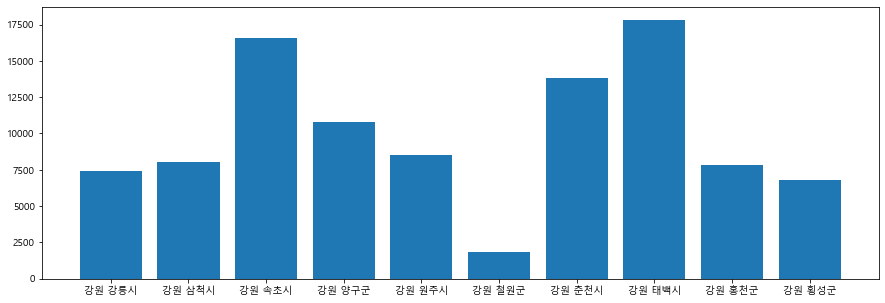

In [24]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (15,5)


plt.bar(grouped.mean().index[0:10], grouped.mean().values[0:10])

In [25]:
def get_col_unique(data):
    print("데이터 프레임 열들의 속성 값들을 보여줍니다.")
    print("----------------------------------------------------------------------------------------------")
    for i in range(len(data.columns)):
        print(data.columns[i],":",data.iloc[:,i].unique(), "속성값의 갯수 :", len(data.iloc[:,i].unique()))
        print("----------------------------------------------------------------------------------------------")

def store_plot(data,start_id,end_id):
    plt.figure(figsize=(15, 6))
    for i in data['store_id'].unique()[start_id:end_id]:
        plt.plot(data[data['store_id']== i].index, data[data['store_id'] == i].amount, label='store_{}'.format(i))
    plt.legend()

In [ ]:
store_plot()

In [4]:
get_col_unique(dataset)

데이터 프레임 열들의 속성 값들을 보여줍니다.
----------------------------------------------------------------------------------------------
store_id : [   0    1    2 ... 2134 2135 2136] 속성값의 갯수 : 1967
----------------------------------------------------------------------------------------------
card_id : [      0       1       2 ... 4663854 4663855 4663856] 속성값의 갯수 : 3950001
----------------------------------------------------------------------------------------------
card_company : ['b' 'h' 'c' 'a' 'f' 'e' 'g' 'd'] 속성값의 갯수 : 8
----------------------------------------------------------------------------------------------
transacted_date : ['2016-06-01' '2016-06-02' '2016-06-03' ... '2019-01-01' '2019-02-05'
 '2017-10-04'] 속성값의 갯수 : 1003
----------------------------------------------------------------------------------------------
transacted_time : ['13:13' '18:12' '18:52' ... '07:48' '07:51' '08:15'] 속성값의 갯수 : 1440
-----------------------------------------------------------------------------------------

In [ ]:
dataset.